In [1]:
# visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid",context='talk', font_scale=1.1)
%matplotlib inline

In [2]:
%run metapop.py

## t series for fig. 2d

In [3]:
att_rate = 1e-3
disp_rate = 0.01
dim = 10

metpop = MetaPopulation(dim, att_rate, 0.01, r_rate=disp_rate)
metpop.fill_pop()
metpop.add_pop((0,0), 'A')
metpop.add_pop((9,9), 'A')
metpop.add_pop((0,9), 'C')
metpop.add_pop((9,0), 'C')
metpop.set_diet_comp('OP50')

dauer_t = []
RA_t = []
for i in range(600):
    metpop.simulate_pops_one_step()
    a, b = metpop.daur_dist
    dauer_t.append((a, b))
    t1, t2 = metpop.ra_dist
    RA_t.append((t1, t2))
    metpop.diffuse_dauer()

In [44]:
for i in range(600):
    fig, axes = plt.subplots(
        nrows=1,
        ncols=4,
        figsize=(20, 5),
        constrained_layout=True, subplot_kw={'projection':'3d'}, gridspec_kw={'wspace':0.1})

    axes = axes.flatten()
    xpos = np.arange(0, dim, 1)
    ypos = np.arange(0, dim, 1)
    xpos, ypos = np.meshgrid(xpos + 0.5, ypos + 0.5)
    xpos = xpos.flatten()
    ypos = ypos.flatten()
    zpos = np.zeros(dim * dim)
    dx = np.ones(dim * dim) * 0.5
    dy = np.ones(dim * dim) * 0.5
    dz = dauer_t[i][0].flatten()
    axes[0].bar3d(xpos, ypos, zpos, dx, dy, dz)
    dz = RA_t[i][0].flatten()
    axes[1].bar3d(xpos, ypos, zpos, dx, dy, dz, color='gold')
    xpos = np.arange(0, dim, 1)
    ypos = np.arange(0, dim, 1)
    xpos, ypos = np.meshgrid(xpos + 0.5, ypos + 0.5)
    xpos = xpos.flatten()
    ypos = ypos.flatten()
    zpos = np.zeros(dim * dim)
    dx = np.ones(dim * dim) * 0.5
    dy = np.ones(dim * dim) * 0.5
    dz = dauer_t[i][1].flatten()
    axes[2].bar3d(xpos, ypos, zpos, dx, dy, dz)
    dz = RA_t[i][1].flatten()
    axes[3].bar3d(xpos, ypos, zpos, dx, dy, dz, color='gold')

    for ax in axes:
        ax.set_zlim(0, 2000)
        ax.set(xticks=[], yticks=[])#, zticks=[])

    axes[0].set_title('Dauer larvae (P)')
    axes[1].set_title('Reproducing adults (P)')

    axes[2].set_title('Dauer larvae (NP)')
    axes[3].set_title('Reproducing adults (NP)')
    
    fig.suptitle(r'Diet = OP50, step=' + str(i + 1), y=1.1, weight='bold')
    plt.savefig('./figures/t_series/Video_fig2/d4_'+str(i)+'.jpeg', bbox_inches='tight', dpi=300)
    plt.close()

## Figure 4d

In [51]:
lst = np.arange(0, 1000, 100)           
env_cycle= ['OP50', 'Novo', 'OP50', 'Novo', 'OP50', 'OP50', 'OP50', 'OP50', 'Novo', 'OP50']
att_rate = 1e-3
disp_rate = 0.01
dim = 10
metpop = MetaPopulation(dim, att_rate, 0.01, r_rate=disp_rate)
metpop.fill_pop()
metpop.add_pop((0,0), 'A')
metpop.add_pop((dim-1,dim-1), 'A')
metpop.add_pop((0,dim-1), 'C')
metpop.add_pop((dim-1,0), 'C')

dauer_t = []
RA_t = []
count = 0
env_t = []
for i in tqdm(range(1000)):
    if not i%100:
        metpop.set_diet_comp(env_cycle[count])
        metpop.reset_food()
        count += 1
    metpop.simulate_pops_one_step()
    a, b = metpop.daur_dist
    dauer_t.append((a, b))
    t1, t2 = metpop.ra_dist
    RA_t.append((t1, t2))
    metpop.diffuse_dauer()
    env_t.append(metpop.metapop[(0,0)].diet)

100%|██████████| 1000/1000 [00:17<00:00, 57.09it/s]


/Users/akalirad/anaconda3/envs/current_alt/lib/python3.8/site-packages/mpl_toolkits/mplot3d/art3d.py:1196: RuntimeWarning: divide by zero encountered in true_divide
  shade = ((normals / np.linalg.norm(normals, axis=1, keepdims=True))
/Users/akalirad/anaconda3/envs/current_alt/lib/python3.8/site-packages/mpl_toolkits/mplot3d/art3d.py:1196: RuntimeWarning: divide by zero encountered in true_divide
  shade = ((normals / np.linalg.norm(normals, axis=1, keepdims=True))
/Users/akalirad/anaconda3/envs/current_alt/lib/python3.8/site-packages/mpl_toolkits/mplot3d/art3d.py:1196: RuntimeWarning: divide by zero encountered in true_divide
  shade = ((normals / np.linalg.norm(normals, axis=1, keepdims=True))
/Users/akalirad/anaconda3/envs/current_alt/lib/python3.8/site-packages/mpl_toolkits/mplot3d/art3d.py:1196: RuntimeWarning: divide by zero encountered in true_divide
  shade = ((normals / np.linalg.norm(normals, axis=1, keepdims=True))
/Users/akalirad/anaconda3/envs/current_alt/lib/python3.8/sit

KeyboardInterrupt: 

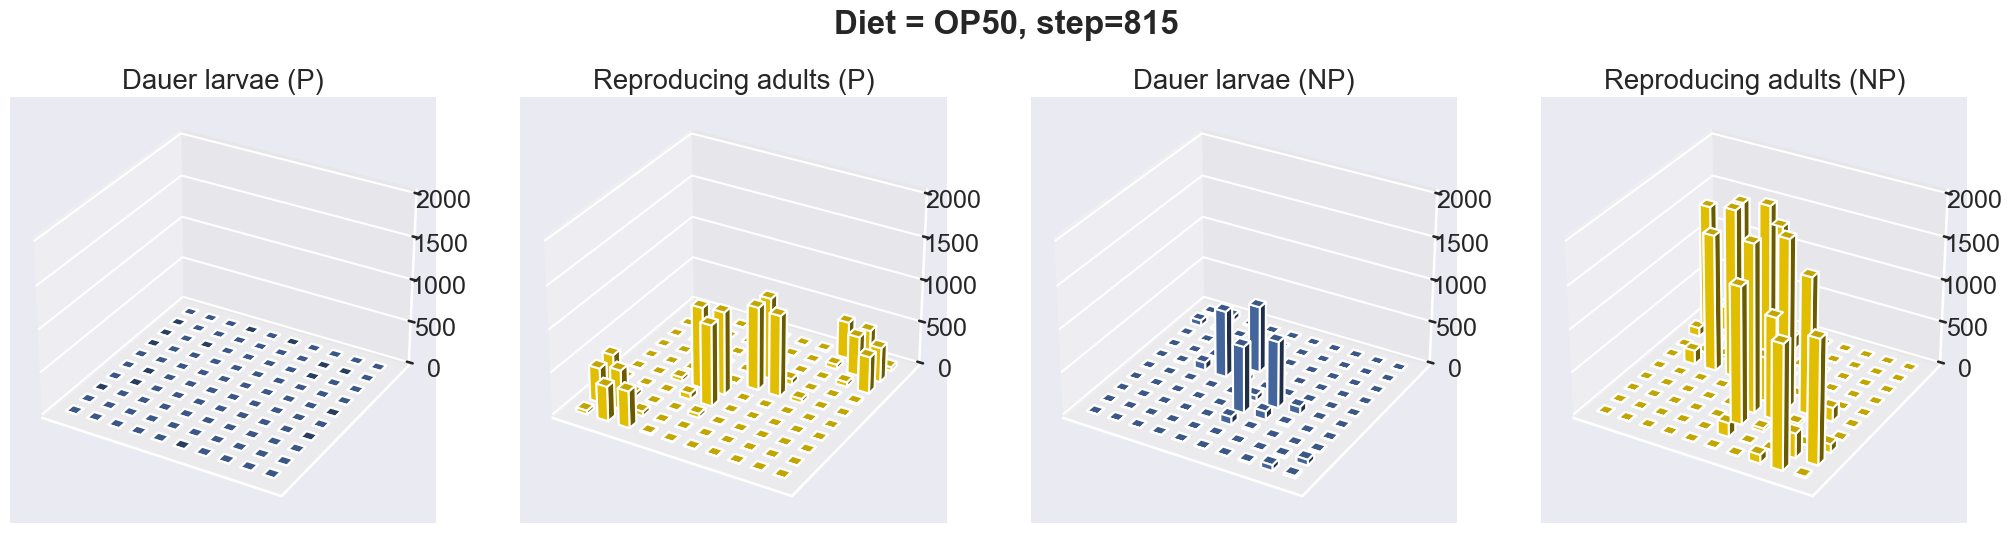

In [53]:
for i in range(1000):
    fig, axes = plt.subplots(
        nrows=1,
        ncols=4,
        figsize=(20, 5),
        constrained_layout=True, subplot_kw={'projection':'3d'}, gridspec_kw={'wspace':0.1})

    axes = axes.flatten()
    xpos = np.arange(0, dim, 1)
    ypos = np.arange(0, dim, 1)
    xpos, ypos = np.meshgrid(xpos + 0.5, ypos + 0.5)
    xpos = xpos.flatten()
    ypos = ypos.flatten()
    zpos = np.zeros(dim * dim)
    dx = np.ones(dim * dim) * 0.5
    dy = np.ones(dim * dim) * 0.5
    dz = dauer_t[i][0].flatten()
    axes[0].bar3d(xpos, ypos, zpos, dx, dy, dz)
    dz = RA_t[i][0].flatten()
    axes[1].bar3d(xpos, ypos, zpos, dx, dy, dz, color='gold')
    xpos = np.arange(0, dim, 1)
    ypos = np.arange(0, dim, 1)
    xpos, ypos = np.meshgrid(xpos + 0.5, ypos + 0.5)
    xpos = xpos.flatten()
    ypos = ypos.flatten()
    zpos = np.zeros(dim * dim)
    dx = np.ones(dim * dim) * 0.5
    dy = np.ones(dim * dim) * 0.5
    dz = dauer_t[i][1].flatten()
    axes[2].bar3d(xpos, ypos, zpos, dx, dy, dz)
    dz = RA_t[i][1].flatten()
    axes[3].bar3d(xpos, ypos, zpos, dx, dy, dz, color='gold')

    for ax in axes:
        ax.set_zlim(0, 2000)
        ax.set(xticks=[], yticks=[])#, zticks=[])

    axes[0].set_title('Dauer larvae (P)')
    axes[1].set_title('Reproducing adults (P)')

    axes[2].set_title('Dauer larvae (NP)')
    axes[3].set_title('Reproducing adults (NP)')
    
    fig.suptitle(r'Diet = ' + str(env_t[i]) + ', step=' + str(i + 1), y=1.1, weight='bold')
    plt.savefig('./figures/t_series/Video_4d/d4_'+str(i)+'.jpeg', bbox_inches='tight', dpi=300)
    plt.close()